# Part 2: Machine Learning Model 

## Outline
Now that you successfully prepared the data, you will train a machine learning model to <b> predict the number of bike shares </b> `cnt`.

1. load prepared data
2. specify target value and training attributes
3. split data in in train and test sets
4. train and predict
5. performance testing

<img src="../Figures/bike.png" alt="Paris" width="600" style="float:left"> 

<p style="font-size:1vw; color:#808080">Powered by TfL Open Data, 
Contains OS data © Crown copyright and database rights 2016 and Geomni UK Map data ©<br> and database rights [2019]<br>
https://www.kaggle.com/hmavrodiev/london-bike-sharing-dataset/metadata</p>

## import necessary libraries

The model you will train is a <b> decision tree </b>. For this import the scikit-learn model `from sklearn.tree import DecisionTreeRegressor` and `from sklearn.model_selection import train_test_split`. You will later test the performance with the mean squared error (MSE) `from sklearn.metrics import mean_squared_error`

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor

In [3]:
sns.set_style('whitegrid')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## load prepared data
Use `pd.read_csv(...)` to load your data.

In [4]:
df = pd.read_csv('inputdata.csv')
df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,month,hour
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,1,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,1,2
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,1,3
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
17031,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,1,19
17032,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,1,20
17033,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,1,21
17034,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0,1,22


## set target value and attributes to train on

The value you want to predict is `cnt`, the count of bike shares at a specific time of the year. Determine `y` as the target value vector. The training attributes will be in the matrix `X`. Choose the attributes `t1`, `t2`,`hum`, `wind_speed`, `weather_code`, `is_holiday`, `is_weekend`,`season`,`month`,`hour` to be in your matrix `X` by using `df[[column1,column2,..]]`.

In [5]:
y = df['cnt']
X = df[['t1','t2','hum', 'wind_speed', 'weather_code', 'is_holiday','is_weekend','season','month','hour']]

## split data into train and test set

Since you need 'untouched' data to later test your algorithm, split the dataframe into two parts: <b> one to train </b> and <b> one to test </b>. Use the function `train_test_split(X,y,train_size,test_size)` with `train_size=0.95` and `test_size=0.05` to do so. 

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.95,test_size=0.05)

 ## train and predict

Here all the magic happens. Use the sckit-learn function `DecisionTreeRegressor(random_state=42)` to call the decision tree. Then `decisiontree.fit(X_train, y_train)` does the training. 

More information on the really cool descision tree algorithm by sckit-learn: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [7]:
decisiontree = DecisionTreeRegressor(random_state=42)

my_decisiontree = decisiontree.fit(X_train, y_train)

Tadaa. The variable `my_decisiontree` now knows how your data works, it is your precious decision making tool. Look at the 3 random instances of your test set, using `X_test.sample(3)`

In [8]:
X_sample = X_test.sample(3)
X_sample

,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,month,hour
2203,12.0,12.0,72.0,8.0,1.0,0.0,0.0,0.0,4,23
4380,17.5,17.5,62.0,9.0,1.0,0.0,0.0,1.0,7,7
6154,16.0,16.0,72.0,17.5,4.0,0.0,0.0,2.0,9,20


According to the respective attributes, how many bike shares `cnt` would you estimate? 

Let's see what your model says: Use `model_fit.predict(X_sample)` to get the predictions of the dicision tree.

In [9]:
my_decisiontree.predict(X_sample)

array([ 593., 2226., 1147.])

Who was closer to the truth? Use `y_test[X_sample.index]` to see the true bike shares stored in you test set.

In [10]:
X_sample.index
pd.DataFrame(y_test[X_sample.index])

,cnt
2203,361
4380,2394
6154,1156


Probably the estimates will be a few counts away from the true value. How well does the model perform in general?

## performance testing

Test your model on a broader scale. First, predict the `X_test` sample with `y_predict = model_fit.predict(...)`.

In [12]:
y_predict = my_decisiontree.predict(X_test)

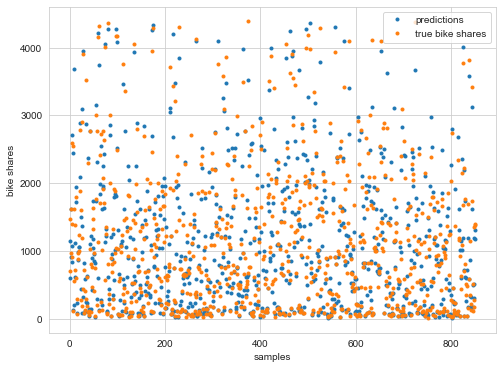

In [13]:
x = range(len(y_predict))
plt.figure(figsize = (8,6))
plt.plot(x,y_predict,'.',label='predictions')
plt.plot(x,y_test,'.',label='true bike shares')
plt.ylabel('bike shares')
plt.xlabel('samples')
plt.legend()
plt.show()

Use the function `mean_squared_error(y_test,y_predict, square=False)` to evaluate the rooted MSE.

In [14]:
RMSE = mean_squared_error(y_predict,y_test, squared=False)
print("RMSE = ", RMSE)

RMSE =  304.24505581949944


How bad is this? Determine the ratio between the `RMSE` and the mean value of `cnt` using the function `mean()` and de divide operator `/`.

In [15]:
ratio = RMSE/df['cnt'].mean()
ratio

0.27908732249666846

## improve

Can your decision tree do better? There are many parameters, which you can adjust in a decision tree.
For example take the parameter `min_samples_leaf`: The minimum number of samples required to be at a leaf node. Per default this parameter is set to `2`. Test it with `min_samples_leaf=10`.

In [16]:
decisiontree = DecisionTreeRegressor(random_state=42, min_samples_leaf=5)

model_fit = decisiontree.fit(X_train, y_train)
y_predict = model_fit.predict(X_test)

RMSE = mean_squared_error(y_predict,y_test, squared=False)
print("RMSE = ", RMSE)

RMSE =  270.213398162473


Indeed, this is already much better. But would be the optimal value for `min_samples_leaf`?

In [17]:
error = []
for i in range(1,100):
    decisiontree = DecisionTreeRegressor(random_state=42, min_samples_leaf=i)

    model_fit = decisiontree.fit(X_train, y_train)
    y_predict = model_fit.predict(X_test)
    RMSE = mean_squared_error(y_predict,y_test, squared=False)
    error.append(RMSE)

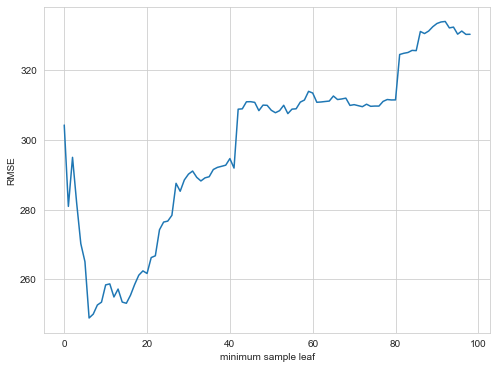

In [18]:
plt.figure(figsize = (8,6))
plt.plot(error)
plt.ylabel('RMSE')
plt.xlabel('minimum sample leaf')
plt.show()

In [19]:
index = np.argwhere(error == np.amin(error))
print("The minimum error is", error[index[0][0]])
print("at a minimum sample leaf = ",index[0][0])

The minimum error is 248.88515017544066
at a minimum sample leaf =  6


The conclusion is it is better to use a `min_samples_leaf ~ 8` to have a minimum error. Try it with the optimized parameter!

In [20]:
decisiontree = DecisionTreeRegressor(random_state=42, min_samples_leaf=5)

model_fit = decisiontree.fit(X_train, y_train)
y_predict = model_fit.predict(X_test)

RMSE = mean_squared_error(y_predict,y_test, squared=False)
print("RMSE = ", RMSE)

RMSE =  270.213398162473


Congratulations, you have <b> trained, tested and optimized your own machine learning model! </b> The stakeholders of the city vienna will be more than satisfied!

__________
Additional:
    
Try the same with another model e.g. `RandomForestRegressor(random_state=42)`

In [21]:
randomforest = RandomForestRegressor(random_state=42)

model_fit = randomforest.fit(X_train, y_train)
y_predict = model_fit.predict(X_test)

RMSE = mean_squared_error(y_predict,y_test, squared=False)
print("MSE = ", RMSE)

MSE =  220.34831502284317
